In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys, os

#sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [3]:
import explore
import plot
# import clean
# cleaned = clean.clean()

# Import the data

In [4]:
data_url = explore.get_data_url("data/clean_merged.csv", "v5")
df = pd.read_csv(data_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717114 entries, 0 to 717113
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           717114 non-null  int64  
 1   trip_start_time    717114 non-null  object 
 2   trip_end_time      717114 non-null  object 
 3   origin_lat         717114 non-null  float64
 4   origin_long        717114 non-null  float64
 5   destination_lat    717114 non-null  float64
 6   destination_long   717114 non-null  float64
 7   trip_duration      717114 non-null  object 
 8   trip_duration_hrs  717114 non-null  float64
 9   trip_distance_km   717114 non-null  float64
 10  driver_id          717114 non-null  int64  
 11  driver_action      717114 non-null  object 
 12  driver_lat         717114 non-null  float64
 13  driver_lng         717114 non-null  float64
 14  driver-origin_km   717114 non-null  float64
 15  driver-dest_km     717114 non-null  float64
dtypes:

# Add New Features

## 1. Is it weekday?

In [5]:
df.columns

Index(['order_id', 'trip_start_time', 'trip_end_time', 'origin_lat',
       'origin_long', 'destination_lat', 'destination_long', 'trip_duration',
       'trip_duration_hrs', 'trip_distance_km', 'driver_id', 'driver_action',
       'driver_lat', 'driver_lng', 'driver-origin_km', 'driver-dest_km'],
      dtype='object')

In [6]:
df['trip_start_time'] = pd.to_datetime(df['trip_start_time'])

In [27]:
s_days = df['trip_start_time'].apply(lambda x: x.day_of_week)

df['is_weekday'] = s_days.apply(lambda x: 1 if x<5 else 0)
df['is_weekend'] = s_days.apply(lambda x: 0 if x<5 else 1)

In [31]:
df['is_weekday'].value_counts()

1    652986
0     64128
Name: is_weekday, dtype: int64

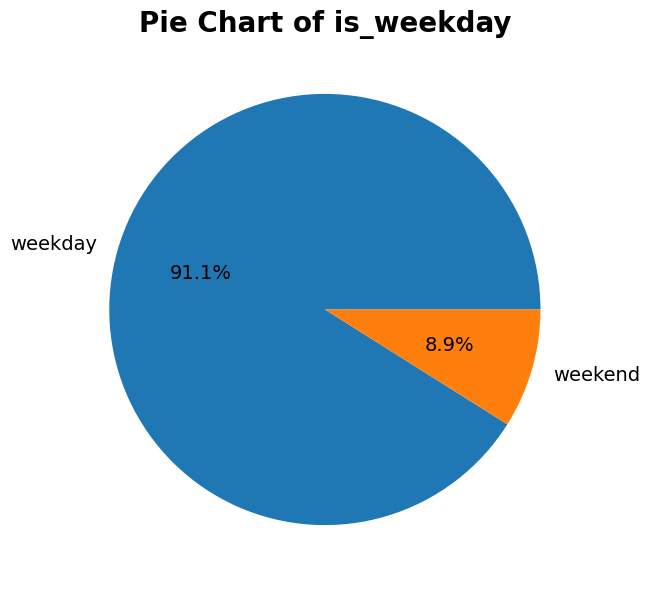

In [30]:
plot.plot_pie(df, 'is_weekday', labels=['weekend', 'weekday'])

## 2. Is it Holiday?